In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/fashion-ai/data/raw/images | wc -l


14774


In [ ]:
import pandas as pd
import os

# CSV dosyasının pathi
csv_path = "/content/drive/MyDrive/fashion-ai/data/raw/styles.csv"

df = pd.read_csv(csv_path, on_bad_lines='skip')

print("🔹 Toplam Satır Sayısı:", len(df))
print("🔹 Sütunlar:", df.columns.tolist())
print("🔹 Null Değerler:\n", df.isnull().sum())

image_dir = "/content/drive/MyDrive/fashion-ai/data/raw/images/"
df["image_name"] = df["id"].astype(str) + ".jpg"
df["image_exists"] = df["image_name"].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))

#eşleşmeyen satırlar
missing = df[~df["image_exists"]]
print(f" Eşleşmeyen {len(missing)} satır var (resmi olmayan).")

#eşleşen satırlar
df_clean = df[df["image_exists"]].reset_index(drop=True)
print(f" Eşleşen veri sayısı (temizlenmiş): {len(df_clean)}")


🔹 Toplam Satır Sayısı: 44424
🔹 Sütunlar: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']
🔹 Null Değerler:
 id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64
 Eşleşmeyen 29666 satır var (resmi olmayan).
 Eşleşen veri sayısı (temizlenmiş): 14758


 Eksik veriler temizlendi ve istenmeyen kategoriler çıkarıldı.
 Temizlenmiş veri kaydedildi: /content/drive/MyDrive/fashion-ai/data/processed/cleaned_styles.csv


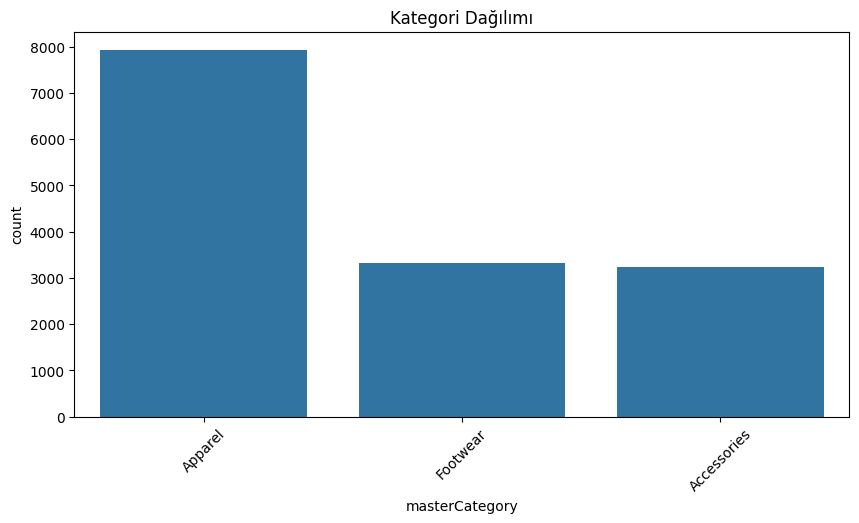

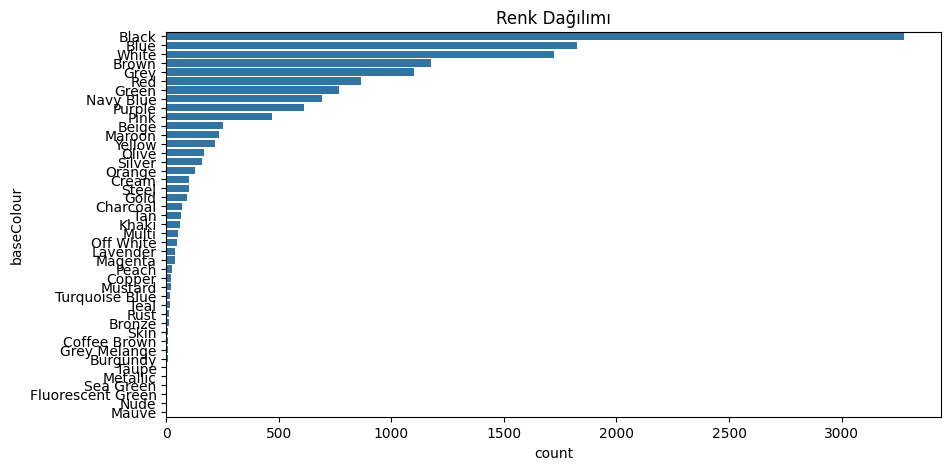

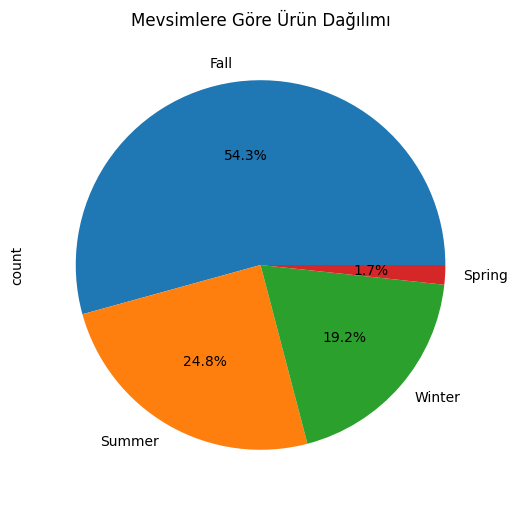

 Kategori ve renk bazlı analiz tamamlandı!


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


csv_path = "/content/drive/MyDrive/fashion-ai/data/raw/styles.csv"
df = pd.read_csv(csv_path, on_bad_lines='skip')

image_dir = "/content/drive/MyDrive/fashion-ai/data/raw/images/"

df["image_name"] = df["id"].astype(str) + ".jpg"
df["image_exists"] = df["image_name"].apply(lambda x: os.path.exists(os.path.join(image_dir, x)))

df = df[df["image_exists"]].reset_index(drop=True)

# gereksiz kategorileri temizleme
excluded_categories = ["Sporting Goods", "Free Items", "Personal Care"]
df = df[~df["masterCategory"].isin(excluded_categories)].reset_index(drop=True)

# eksik verileri doldurma
for col in ["baseColour", "season", "year", "usage", "productDisplayName"]:
    df[col] = df[col].fillna(df[col].mode()[0])

print(" Eksik veriler temizlendi ve istenmeyen kategoriler çıkarıldı.")

output_path = "/content/drive/MyDrive/fashion-ai/data/processed/cleaned_styles.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)

df.to_csv(output_path, index=False)
print(f" Temizlenmiş veri kaydedildi: {output_path}")

# Kategori analizi
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="masterCategory", order=df["masterCategory"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Kategori Dağılımı")
plt.show()

# Renk analizi
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y="baseColour", order=df["baseColour"].value_counts().index)
plt.title("Renk Dağılımı")
plt.show()

# Mevsime göre analiz
df["season"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Mevsimlere Göre Ürün Dağılımı")
plt.show()

print(" Kategori ve renk bazlı analiz tamamlandı")